In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import os

# Load dataset
file_path = r"C:\Users\tetlo\OneDrive\Desktop\prostate_cancer_prediction_updated.xlsx"

try:
    # Load the dataset
    df = pd.read_excel(file_path, engine='openpyxl')
    print(f"Successfully loaded file from:\n{file_path}")

    # Data exploration
    print("\n=== Data Summary ===")
    print("Shape:", df.shape)
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nMissing values:")
    print(df.isnull().sum())

    # Target column
    target_column = 'Biopsy_Result (1=Malignant, 0=Benign)'
    if target_column not in df.columns:
        print("\nError: Target column not found!")
        print("Available columns:", df.columns.tolist())
        exit()

    print("\nClass distribution:")
    print(df[target_column].value_counts())

    # Prepare data
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Handle missing values with imputer
    imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
    X_imputed = imputer.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model training
    model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    model.fit(X_train_scaled, y_train)

    # Evaluation
    y_pred = model.predict(X_test_scaled)

    print("\n=== Model Evaluation ===")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Feature importance
    if hasattr(model, 'coef_'):
        print("\nFeature Importance:")
        importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': model.coef_[0]
        }).sort_values('Coefficient', ascending=False)
        print(importance)

except PermissionError:
    print("\nError: Please close the Excel file and try again.")
except Exception as e:
    print(f"\nAn error occurred: {str(e)}")
finally:
    print("\nAnalysis complete.")


Successfully loaded file from:
C:\Users\tetlo\OneDrive\Desktop\prostate_cancer_prediction_updated.xlsx

=== Data Summary ===
Shape: (28945, 30)

First 5 rows:
   Patient_ID  Age  Family_History  (1=Yes, 0=No)  \
0           1   78                              0   
1           2   68                              0   
2           3   54                              0   
3           4   82                              0   
4           5   47                              1   

   Race_African_Ancestry (1=Yes, 0=No)  PSA_Level  \
0                                    1       5.07   
1                                    1      10.24   
2                                    0      13.79   
3                                    0       8.03   
4                                    0       1.89   

   DRE_Result (0=Normal, Abnormal=1)  Biopsy_Result (1=Malignant, 0=Benign)  \
0                                  0                                      0   
1                                  0         

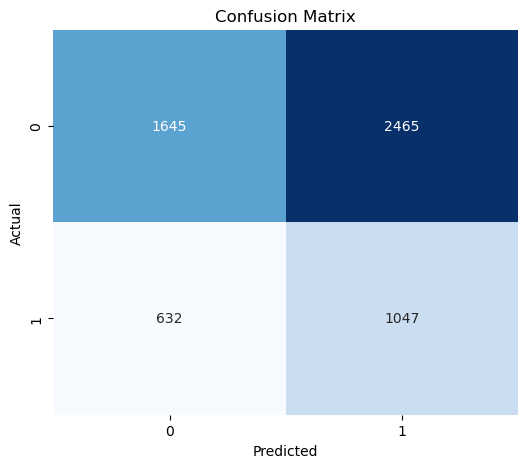

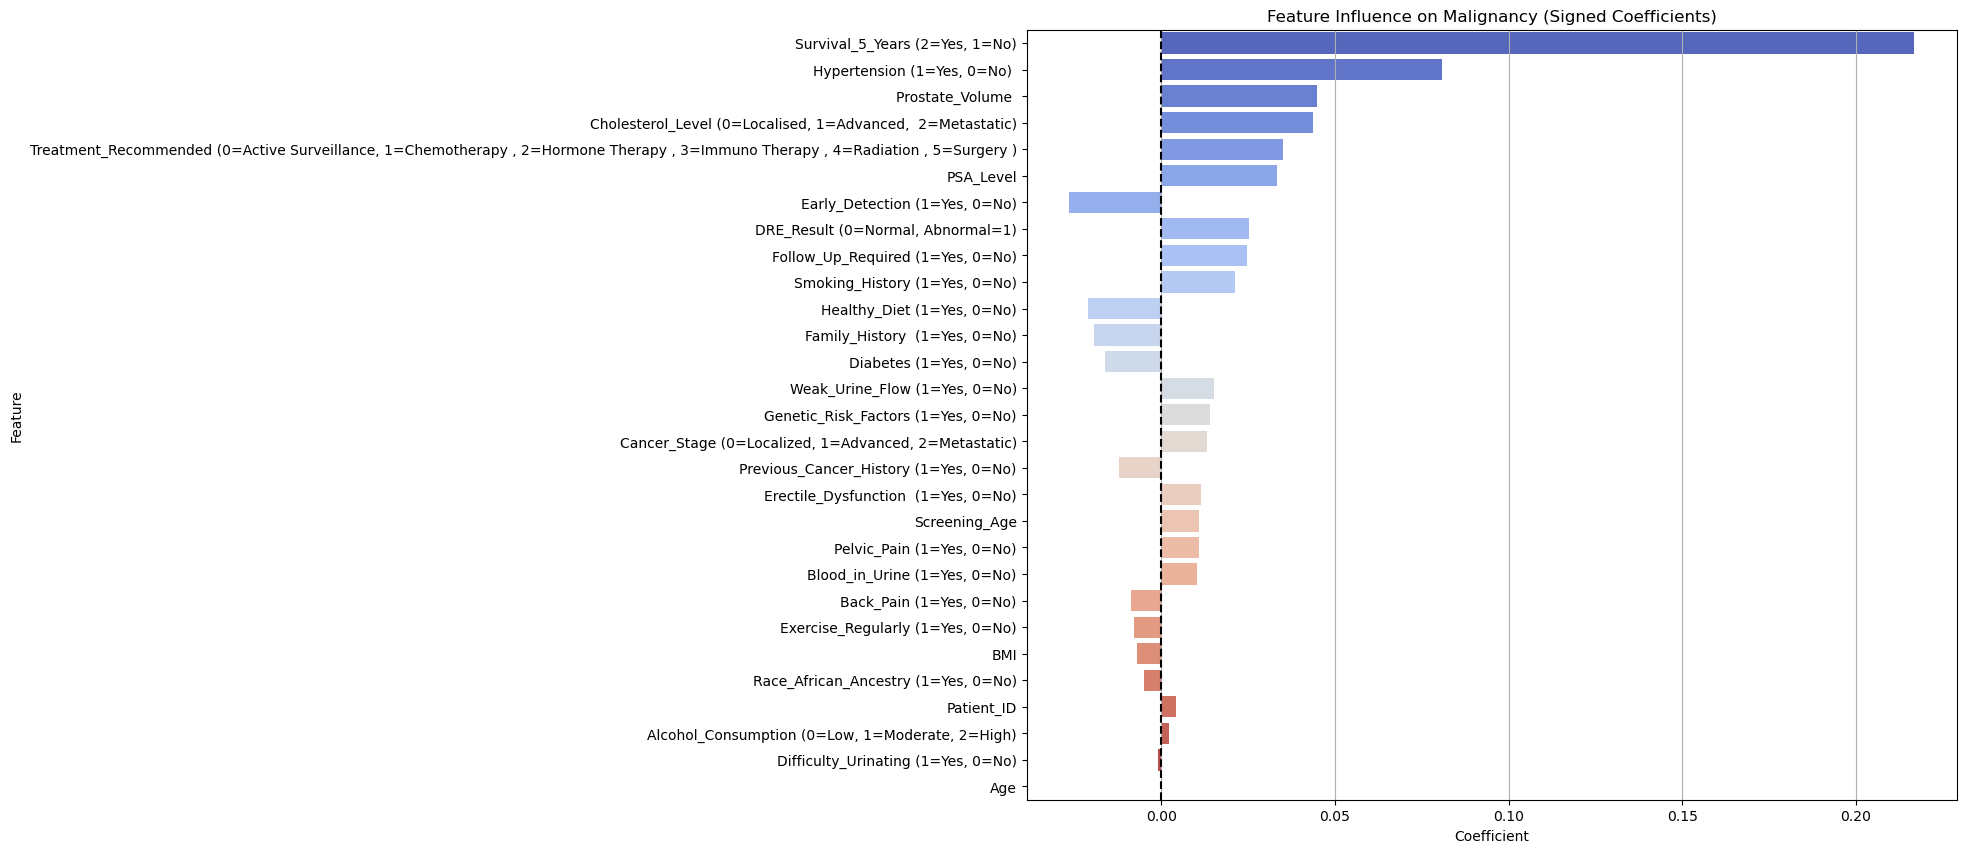

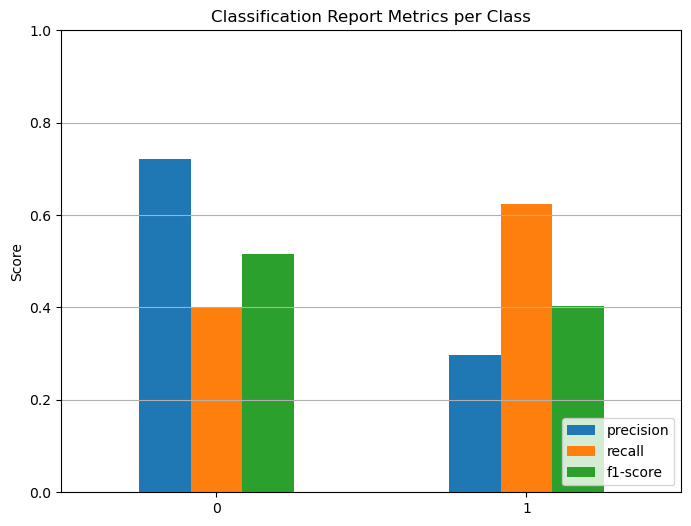

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# --- 1. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 2. Feature Importance Bar Plot ---
# Plot absolute values
# Plot raw coefficients (with sign)
plt.figure(figsize=(12,10))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance_sorted,
    palette='coolwarm',
    hue='Feature',
    dodge=False,
    legend=False
)
plt.axvline(x=0, color='black', linestyle='--')  # Show zero line
plt.title('Feature Influence on Malignancy (Signed Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


# --- 3. Classification Report Bar Plot ---
# Generate report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Focus only on classes 0 and 1
report_df = report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

# Plot
report_df.plot(kind='bar', figsize=(8,6))
plt.title('Classification Report Metrics per Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()
